## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/sumit/Desktop/HP Laptop/Sumit Docs/iNeuron/Krish/Cotton Disease Prediction/Cotton-Disease-Predictions/Datasets/train'
valid_path = 'C:/Users/sumit/Desktop/HP Laptop/Sumit Docs/iNeuron/Krish/Cotton Disease Prediction/Cotton-Disease-Predictions/Datasets/test'


In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87916544/87910968 [==============================] - 20s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('C:/Users/sumit/Desktop/HP Laptop/Sumit Docs/iNeuron/Krish/Cotton Disease Prediction/Cotton-Disease-Predictions/Datasets/train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/sumit/Desktop/HP Laptop/Sumit Docs/iNeuron/Krish/Cotton Disease Prediction/Cotton-Disease-Predictions/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory('C:/Users/sumit/Desktop/HP Laptop/Sumit Docs/iNeuron/Krish/Cotton Disease Prediction/Cotton-Disease-Predictions/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 38s 630ms/step - loss: 2.6485 - accuracy: 0.7104 - val_loss: 1.7174 - val_accuracy: 0.7222
Epoch 2/20
61/61 [==============================] - 38s 617ms/step - loss: 0.7057 - accuracy: 0.8826 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 39s 639ms/step - loss: 0.4619 - accuracy: 0.9124 - val_loss: 2.1804e-04 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 39s 639ms/step - loss: 0.4455 - accuracy: 0.9190 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 39s 632ms/step - loss: 0.6770 - accuracy: 0.9072 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 39s 637ms/step - loss: 0.4303 - accuracy: 0.9308 - val_loss: 0.1428 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 38s 625ms/

In [20]:
import matplotlib.pyplot as plt

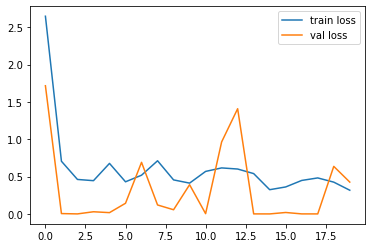

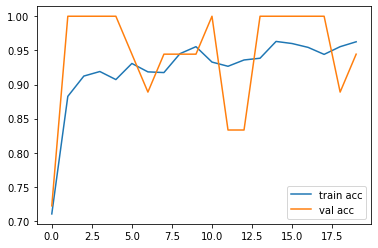

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [23]:

y_pred = model.predict(test_set)


In [24]:
y_pred

array([[5.9651077e-28, 1.3730800e-03, 0.0000000e+00, 9.9862695e-01],
       [1.4538077e-14, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.9908324e-35],
       [5.7450541e-25, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0686192e-24, 1.0000000e+00, 4.8543422e-27, 4.8298202e-24],
       [1.0000000e+00, 4.9904742e-33, 1.7268004e-34, 0.0000000e+00],
       [1.0230192e-08, 2.5889542e-11, 1.0000000e+00, 7.0640161e-29],
       [1.0000000e+00, 7.1237469e-12, 7.0438191e-26, 9.3003821e-25],
       [1.0000000e+00, 0.0000000e+00, 2.1045175e-32, 3.3048868e-26],
       [9.1149035e-16, 1.0000000e+00, 2.6082400e-22, 1.9617524e-14],
       [2.9854584e-16, 4.0891406e-26, 1.0000000e+00, 1.2821462e-22],
       [6.0109045e-02, 1.1303097e-06, 1.6087522e-10, 9.3988985e-01],
       [1.1115013e-25, 2.9310058e-27, 2.6611660e-36, 1.0000000e+00],
       [9.8856771e-04, 1.2672158e-24, 9.9901140e-01, 2.5376810e-22],
       [1.2132023e-05, 9.7605125e-

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([3, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 3, 3, 2, 3, 1, 0, 3], dtype=int64)

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('C:/Users/sumit/Desktop/HP Laptop/Sumit Docs/iNeuron/Krish/Cotton Disease Prediction/Cotton-Disease-Prediction-Deep-Learning-master/model_inception.h5')

In [29]:
img_data

NameError: name 'img_data' is not defined

In [11]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [12]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [13]:
x.shape

(224, 224, 3)

In [14]:
x=x/255

In [15]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [16]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [17]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])

In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.2.0'